# Tutorial IV.III - Constraints in JuMP

Applied Optimization with Julia

# Introduction

Welcome to this tutorial on constraints in JuMP! In this lesson, we’ll
explore how to add rules (constraints) to our optimization problems.

By the end of this tutorial, you’ll be able to: 1. Create simple
constraints for your optimization problems 2. Use containers (like
arrays) to manage multiple similar constraints 3. Create more complex
constraints based on conditions

Let’s start by loading the necessary packages:

In [1]:
using JuMP, HiGHS

Now, let’s create a model that we’ll use throughout this tutorial:

In [2]:
another_model = Model(HiGHS.Optimizer)
println("Great! We've created a new optimization model.")

Great! We've created a new optimization model.


------------------------------------------------------------------------

# Section 1 - Objective Functions with Container Variables

Defining objective functions with variables in containers allows for
scalable and dynamic model formulations. First, we need a container with
variables for the objective function. For example:

``` julia
@variable(modelName, variableName[1:3] >= 0)
```

Now, we can define an objective function with the container. For
example:

``` julia
@objective(modelName, Max, sum(variableName[i] for i in 1:3))
```

## Exercise 1.1 - Define arrays

Scenario: Imagine you’re optimizing the production of 8 different
products in a factory. Each product has a different profit margin, and
you want to maximize total profit.

Define an array of variables and an objective function for
`another_model`. The variables should be called `profits` and have a
range from `1:8`. It has a lower bound of `0`. The objective should be a
Maximization of the sum of all `profits`.

In [3]:
# YOUR CODE BELOW
@variable(another_model, profits[1:8] >= 0)
@objective(another_model, Max, sum(profits[i] for i in 1:8))

profits[1] + profits[2] + profits[3] + profits[4] + profits[5] + profits[6] + profits[7] + profits[8]

In [4]:
# Test your answer
@assert length(profits) == 8 && all(lower_bound(profits[i]) == 0 for i in 1:8)
@assert typeof(objective_function(another_model)) == AffExpr
println("Objective function with container variables defined successfully!")

Objective function with container variables defined successfully!


------------------------------------------------------------------------

# Section 2 - Constraints within Containers

Defining constraints within containers allows for structured and easily
manageable models. This is especially important when models become
larger! To define a constraint within a container, we can do, for
example, the following:

``` julia
@constraint(modelName,
    constraintName[i in 1:3],
    variableName[i] <= 100
)
```

This would create a constraint called `constraintName` for each `i` -
thus `1`,`2`, and `3` - where `variableName[1]`, `variableName[2]`, and
`variableName[3]` are restricted to be maximally `100`.

# Exercise 2.1 - Define constraints

Continuing our factory scenario: Each product has a maximum daily
production capacity due to machine limitations.

Define constraints called `maxProfit` using an array of variables. The
logic: Each profit defined in the previous task should be less than or
equal to `12`.

In [5]:
# YOUR CODE BELOW
@constraint(another_model,
    maxProfit[i in 1:8],
    profits[i] <= 12
)

8-element Vector{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.LessThan{Float64}}, ScalarShape}}:
 maxProfit[1] : profits[1] <= 12
 maxProfit[2] : profits[2] <= 12
 maxProfit[3] : profits[3] <= 12
 maxProfit[4] : profits[4] <= 12
 maxProfit[5] : profits[5] <= 12
 maxProfit[6] : profits[6] <= 12
 maxProfit[7] : profits[7] <= 12
 maxProfit[8] : profits[8] <= 12

In [6]:
# Test your answer
@assert all(is_valid(another_model, maxProfit[i]) for i in 1:8)
println("Constraints within containers defined successfully!")

Constraints within containers defined successfully!


------------------------------------------------------------------------

# Section 3 - Implementing Conditional Constraints

Conditional constraints are added to the model based on certain
conditions, allowing for dynamic and flexible model formulations. To
define a constraint within a container under conditions, we can do the
following:

``` julia
@constraint(modelName,
    constraintName[i in 1:3; i <= 2],
    variableName[i] <= 50
)
```

This would create a constraint called `constraintName` for each `i` -
thus `1`,`2`, and `3` - where `variableName[1]`, `variableName[2]` are
restricted to be maximally `50` and `variableName[3]` was not
restricted.

## Exercise 3.1 - Add a conditional constraints

Scenario extension: The first 4 products are new and have limited market
demand.

Add a conditional constraint `smallProfit` to the previous model.
Condition: Only the first 4 variables profit have to be lower or
equalthan 5.

In [20]:
# YOUR CODE BELOW
@constraint(
    another_model,
    smallProfit[i in 1:8; i <= 4],
    profits[i] <= 5
)

JuMP.Containers.SparseAxisArray{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.LessThan{Float64}}, ScalarShape}, 1, Tuple{Int64}} with 4 entries:
  [1]  =  smallProfit[1] : profits[1] <= 5
  [2]  =  smallProfit[2] : profits[2] <= 5
  [3]  =  smallProfit[3] : profits[3] <= 5
  [4]  =  smallProfit[4] : profits[4] <= 5

In [21]:
# Test your answer
@assert all(is_valid(another_model, smallProfit[i]) for i in 1:4)
println("Conditional constraint implemented successfully!")
println("Checking successful implementation.")
optimize!(another_model)
status = termination_status(another_model)
@assert status == MOI.OPTIMAL "Sorry, something didn't work out as the model status is $status"
@assert objective_value(another_model) ≈ 68 atol=1e-4 "Although you have an optimal solution,
    the should be 68 not $(objective_value(another_model)). Is the model correct?"
println("Model components validated successfully!")

Conditional constraint implemented successfully!
Checking successful implementation.
Running HiGHS 1.12.0 (git hash: 755a8e027): Copyright (c) 2025 HiGHS under MIT licence terms
LP has 28 rows; 8 cols; 28 nonzeros
Coefficient ranges:
  Matrix  [1e+00, 1e+00]
  Cost    [1e+00, 1e+00]
  Bound   [0e+00, 0e+00]
  RHS     [5e+00, 5e+01]
Presolving model
0 rows, 0 cols, 0 nonzeros  0s
0 rows, 0 cols, 0 nonzeros  0s
Presolve reductions: rows 0(-28); columns 0(-8); nonzeros 0(-28) - Reduced to empty
Performed postsolve
Solving the original LP from the solution after postsolve

Model status        : Optimal
Objective value     :  4.0000000000e+01
P-D objective error :  0.0000000000e+00
HiGHS run time      :          0.00


LoadError: AssertionError: 0.0001

# Visualization of Results

Let’s visualize our optimal solution:

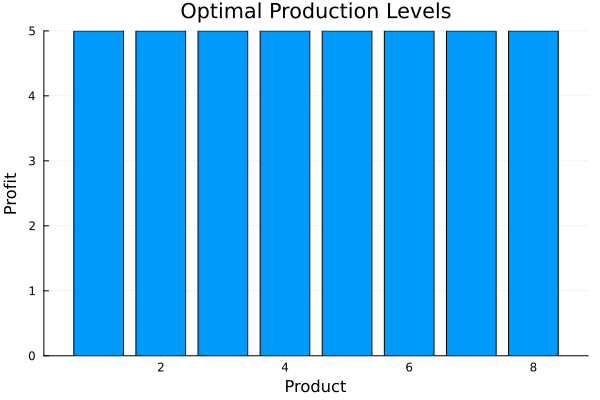

In [22]:
using Plots
# Assuming the model has been solved!!!
optimal_profits = value.(profits)

bar(1:8, optimal_profits,
    title="Optimal Production Levels",
    xlabel="Product",
    ylabel="Profit",
    legend=false)

------------------------------------------------------------------------

# Conclusion

Congratulations! You’ve completed the tutorial on advanced handling of
objective functions and constraints in JuMP. You’ve learned how to
define objective functions and constraints using container variables.
Continue to the next file to learn more.

# Solutions

You will likely find solutions to most exercises online. However, I
strongly encourage you to work on these exercises independently without
searching explicitly for the exact answers to the exercises.
Understanding someone else’s solution is very different from developing
your own. Use the lecture notes and try to solve the exercises on your
own. This approach will significantly enhance your learning and
problem-solving skills.

Remember, the goal is not just to complete the exercises, but to
understand the concepts and improve your programming abilities. If you
encounter difficulties, review the lecture materials, experiment with
different approaches, and don’t hesitate to ask for clarification during
class discussions.